In [1]:
# 3일차 tensor

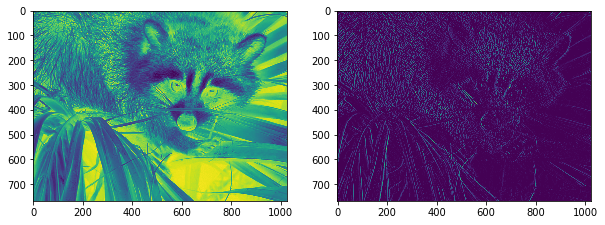

In [1]:
%matplotlib inline
import scipy as sp
from scipy import misc
import numpy as np
import matplotlib.pylab as plt
import scipy.ndimage # scikit _ 이미지
# 반전 0~255 
img = 255 - sp.misc.face(gray=True).astype(float)
# 이미지,동영상
# edge detection filter - 경계선 검출
k = np.zeros((2,2))
# 0 0 
# 0 0 
k[:,0] = 1; k[:,1] = -1
# 1 -1
# 1 -1
# convolve 이미지에서 필터, 정보통신 무선신호 복원
img2 = np.maximum(0,sp.ndimage.filters.convolve(img,k))
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False) # 격자
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)
plt.show() 

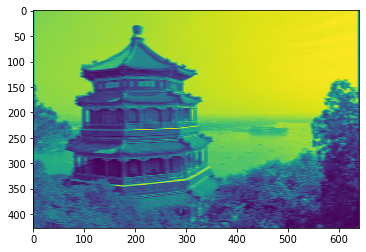

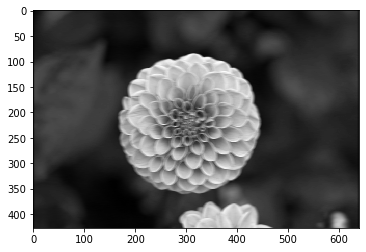

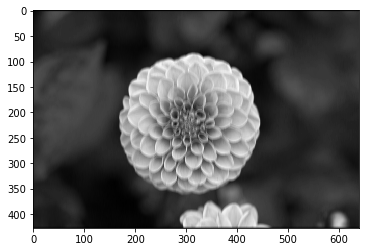

(?, 427, 640, 2)


In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import tensorflow as tf
# 1, height, width, channels # 차수 일치
china = load_sample_image("china.jpg") # 자동 4차원 , 0~1, 0~255
# 이미지 정규화 칼라값을 255으로 나누면 0~1가 나옴.
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
# (2, 427, 640, 3)
# 장수, 높이, 넓이, 컬러수(RGB) -> 컬러는 숫자임.
batch_size, height, width, channels = dataset.shape
filters = np.zeros(shape = (7,7,channels,2), dtype = np.float32)

filters[:,3,:,0] = 1

filters[3,:,:,1] = 1

# 주입변수 2, 427, 640, 3 ( 컬러 ) -> 단색
X = tf.placeholder(tf.float32, shape = (None, height, width,channels))
# 이미지 포맷은 정해져있음 4차원으로 
# 427, 640 으로 나감 SAME 때문에.
convolution = tf.nn.conv2d(X,filters,strides=[1,1,1,1], padding="SAME")
# graph (node + edge)
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X:dataset})
plt.imshow(output[0,:,:,1], cmap='gray')
plt.show()
plt.imshow(output[1,:,:,1], cmap='gray')
plt.show()
plt.imshow(output[1,:,:,0], cmap='gray')
plt.show()
type(output)
print(convolution.shape)

In [30]:
def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.axis('off')
def plot_color_image(image):
    plt.imshow(image.astype(np.unit8), interpolation='nearest')
    plt.axis('off')

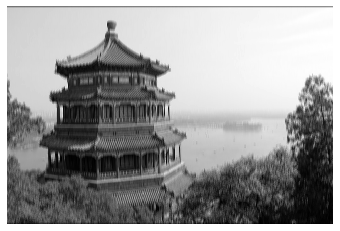

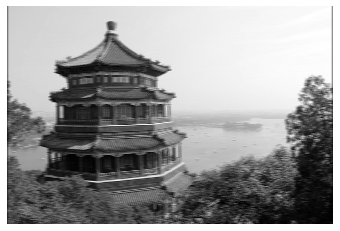

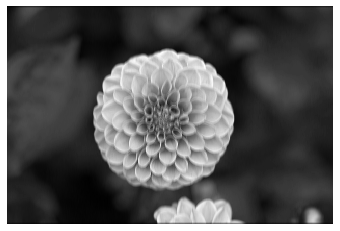

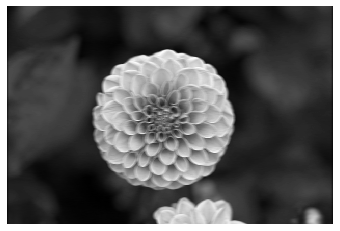

In [32]:
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

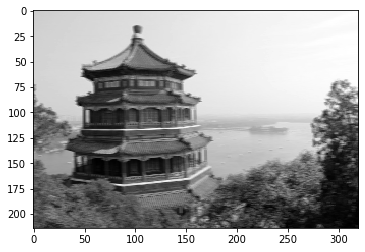

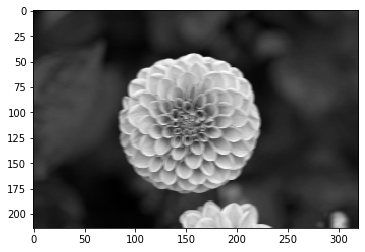

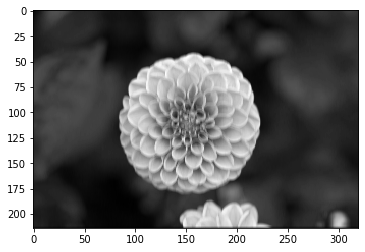

(?, 427, 640, 2)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import tensorflow as tf
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,1,1,1], padding="SAME")
max_pool = tf.nn.max_pool(convolution, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
# 여기 참고 ksize 는 필터 개념인가봥
# https://bcho.tistory.com/tag/stride
    
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
plt.imshow(output[0,:,:,1], cmap='gray')
plt.show()
plt.imshow(output[1,:,:,1], cmap='gray')
plt.show()
plt.imshow(output[1,:,:,0], cmap='gray')
plt.show()
type(output)
print(convolution.shape)




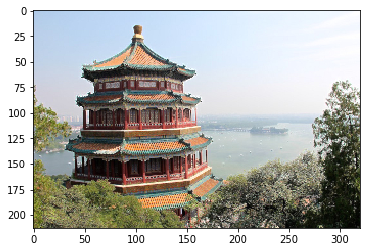

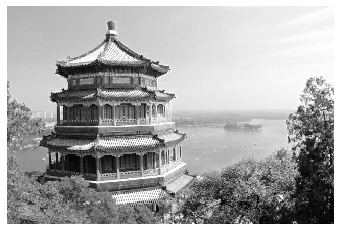

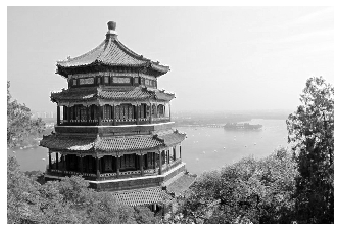

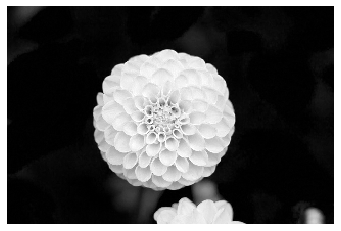

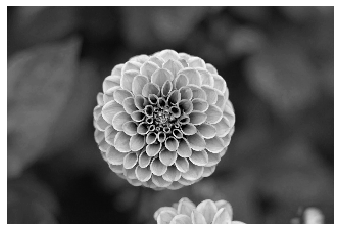

In [6]:
# max pooling 된 결과를 이미지 출력하시오
# conv2d 채널 1개로 생성, max_pool 채널 그대로 남겨둠
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
plt.imshow(output[0].astype(np.uint8)) # unsigned int 형 (양수)
plt.show()

def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.axis('off')
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation='nearest')
    plt.axis('off')
    
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()
        

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


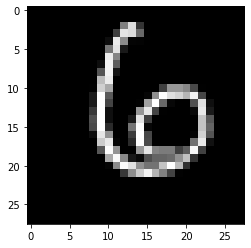

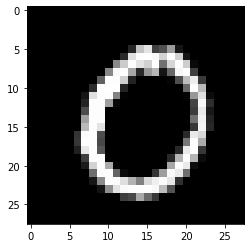

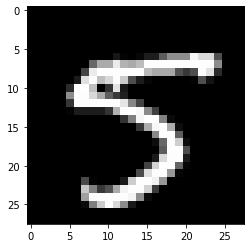

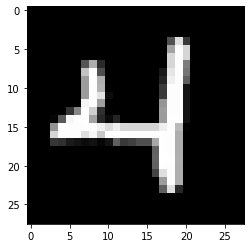

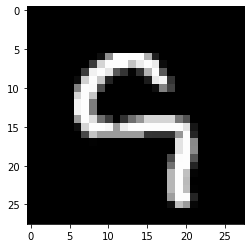

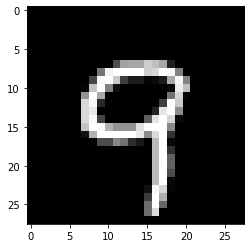

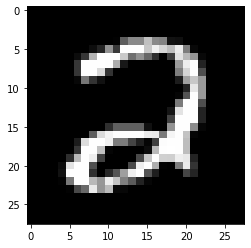

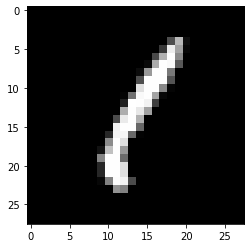

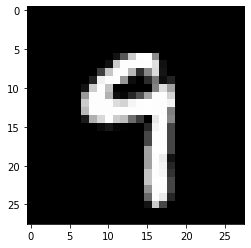

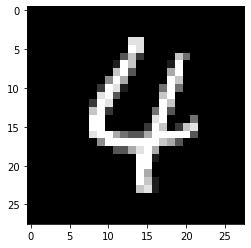

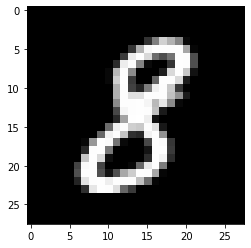

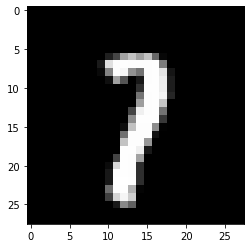

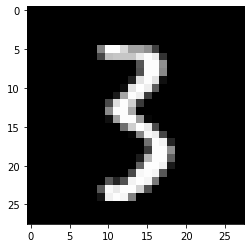

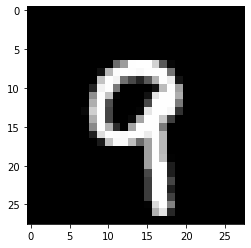

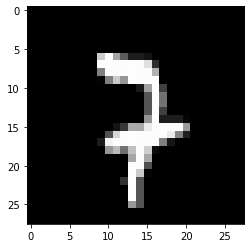

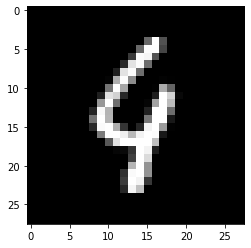

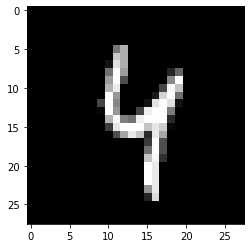

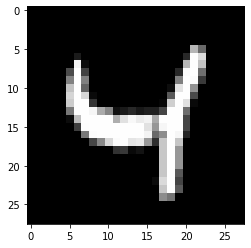

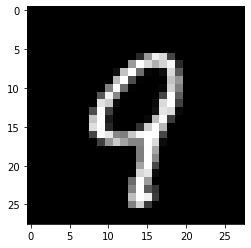

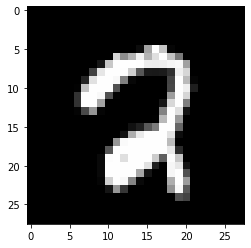

In [5]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
# 5장의 이미지 출력
first_image = mnist.test.images[100:120]
for i in range(20):
    pixels = first_image[i].reshape(28,28)
    plt.imshow(pixels, cmap='gray')
    plt.show()



In [102]:
# 문제 테스트 데이터 100번부터 20개의 데이터를 예측 해 보시오.
#- 예측된 데이터를 출력해보시오.
from tensorflow.python.framework import ops
ops.reset_default_graph() # 그라프 초기화


In [103]:
# 1번 이상 반복되면 함수화
# activation function 마지막에 한번 호출 : 회귀, 분류
# multi - layer : xor 문제해결은 activation 함수를 이용해서 비선형
# cnn -> deep 할 수록 결과가 좋ㄹ음
    
learning_rate = 0.001 # optimizer 사용
num_steps = 500 # epoch
batch_size = 128 # mini batch size
display_step = 10 # 시각화

num_input = 784 # 이미지 28X28 (fully-connected)
num_classes = 10 # one-hot-encoding
dropout = 0.75 # 과적합 방지를 위해 임의적으로 25% 계산 / 임의적으로 계산

X = tf.placeholder(tf.float32, [None, num_input], name="input") #tensor 보드에서 보고싶을때!
Y = tf.placeholder(tf.float32, [None, num_classes], name="output")
keep_prob = tf.placeholder(tf.float32, name="keep")


def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) # 비선형 mapping / Relu 하는이유

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k , 1], strides=[1, k, k, 1], padding='SAME')


In [104]:
def conv_net(x, weights, biases, dropout): # 128 * 784
    x = tf.reshape(x, shape=[-1,28,28,1]) # 원래 이미지 형태로
    # 128 x 28 x 28 x1 (필터가 32장)
    # 
    conv1 = conv2d(x, weights['wc1'], biases['bc1']) # 128x28x28x32
    conv1 = maxpool2d(conv1, k=2) # 128x14x14x32
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2']) # 128x14x14x64
    conv2 = maxpool2d(conv2,k=2) # 128x7x7x64
    # 7*7*64 , 1024 / fully-connected
    fc1 = tf.reshape(conv2,[-1,weights['wd1'].get_shape().as_list()[0]])
    # 7*7*64 , 1024 -> 128 * 1024
    # CNN은 특징을 추출함 -> FFNN
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, dropout) # 25% hyper parameter
    # 128 * 1024 ,1024 * 10 = 128*10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out
# 이미지 사이즈는 -> 필터사이즈 결정

In [105]:
weights = {
    'wc1':tf.Variable(tf.random_normal([5,5,1,32])),
    'wc2':tf.Variable(tf.random_normal([5,5,32,64])),
    'wd1':tf.Variable(tf.random_normal([7*7*64,1024])),
    'out':tf.Variable(tf.random_normal([1024, num_classes]))
}
biases = {
    'bc1':tf.Variable(tf.random_normal([32])),
    'bc2':tf.Variable(tf.random_normal([64])),
    'bd1':tf.Variable(tf.random_normal([1024])),
    'out':tf.Variable(tf.random_normal([num_classes]))
}

In [106]:
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits,name="prediction")
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name="accuracy")

tf.add_to_collection("accuracy", accuracy)
tf.add_to_collection("Xi", X)
tf.add_to_collection("Yi", Y)
tf.add_to_collection("prediction", prediction)
init = tf.global_variables_initializer()

In [89]:

with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X:batch_x, Y:batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            loss,acc = sess.run([loss_op, accuracy],
                               feed_dict={X:batch_x,Y:batch_y,keep_prob:1.0})
            print("Step : ", str(step) + "Minibatch Loss = " + "{:.4f}".format(loss)+ ", Training Accuracy : " + "{:.3f}".format(acc))
    print("Testing Accuracy : ", sess.run(accuracy, feed_dict={X:mnist.test.images[:256],
                                                              Y:mnist.test.labels[:256],
                                                              keep_prob:1.0}))

Step :  1Minibatch Loss = 62921.0859, Training Accuracy : 0.148
Step :  10Minibatch Loss = 24397.0781, Training Accuracy : 0.273
Step :  20Minibatch Loss = 10602.2432, Training Accuracy : 0.562


KeyboardInterrupt: 

In [107]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X:batch_x, Y:batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            loss,acc = sess.run([loss_op, accuracy],
                               feed_dict={X:batch_x,Y:batch_y,keep_prob:1.0})
            print("Step : ", str(step) + "Minibatch Loss = " + "{:.4f}".format(loss)+ ", Training Accuracy : " + "{:.3f}".format(acc))
    save_path = saver.save(sess, 'data/cnn_model.ckpt')
    print("Testing Accuracy : ", sess.run(accuracy, feed_dict={X:mnist.test.images[:256],
                                                              Y:mnist.test.labels[:256],
                                                              keep_prob:1.0}))
    print("예측 :", sess.run(tf.argmax(prediction, 1),feed_dict={X:mnist.test.images[100:120],
                                                              Y:mnist.test.labels[100:120],
                                                              keep_prob:1.0}))

Step :  1Minibatch Loss = 42499.0625, Training Accuracy : 0.094
Step :  10Minibatch Loss = 14819.4004, Training Accuracy : 0.336
Step :  20Minibatch Loss = 8520.9229, Training Accuracy : 0.570
Step :  30Minibatch Loss = 5917.0059, Training Accuracy : 0.711
Step :  40Minibatch Loss = 3468.4351, Training Accuracy : 0.766
Step :  50Minibatch Loss = 1946.5039, Training Accuracy : 0.859
Step :  60Minibatch Loss = 2058.7432, Training Accuracy : 0.875
Step :  70Minibatch Loss = 3603.8867, Training Accuracy : 0.844
Step :  80Minibatch Loss = 2498.1196, Training Accuracy : 0.867
Step :  90Minibatch Loss = 1598.8463, Training Accuracy : 0.922
Step :  100Minibatch Loss = 2039.6531, Training Accuracy : 0.852
Step :  110Minibatch Loss = 1910.7113, Training Accuracy : 0.883
Step :  120Minibatch Loss = 3555.0425, Training Accuracy : 0.836
Step :  130Minibatch Loss = 1597.6031, Training Accuracy : 0.914
Step :  140Minibatch Loss = 2069.1201, Training Accuracy : 0.898
Step :  150Minibatch Loss = 1016.0

In [116]:
# 저장된 모델 불러오기
import tensorflow as tf
tf.set_random_seed(777)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph('data/cnn_model.ckpt.meta')
new_saver.restore(sess,'data/cnn_model.ckpt')
tf.get_default_graph()
Xi = sess.graph.get_tensor_by_name("input:0")
Yi = sess.graph.get_tensor_by_name("output:0")
keep = sess.graph.get_tensor_by_name("keep:0")
accuracy = sess.graph.get_tensor_by_name("accuracy:0")
prediction = sess.graph.get_tensor_by_name("prediction:0")
result = sess.run(accuracy, feed_dict={Xi:mnist.test.images[:256],
                                      Yi:mnist.test.labels[:256],
                                      keep:1.0})
predict = sess.run(tf.argmax(prediction, 1), feed_dict={Xi:mnist.test.images[100:140],
                                      Yi:mnist.test.labels[100:140],
                                      keep:1.0})
print(result)
print(predict)

INFO:tensorflow:Restoring parameters from data/cnn_model.ckpt
0.96484375
[6 0 5 4 9 9 2 1 9 4 8 1 3 9 7 4 4 4 9 7 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0
 1 6 4]


In [111]:
%matplotlib inline
import os


merged =tf.summary.merge_all()
if not os.path.exists('c://tmp/tensorboard_CNN/'):
    os.makedirs('c://tmp/tensorboard_CNN/')
    
    my_writer = tf.summary.FileWriter('c://tmp/tensorboard_CNN/', sess.graph)